# IMAGE AUGMENTATION

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
import scipy
import sklearn
import numpy

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory(r"D:\IBM\Asssignment\Flowers-Dataset\flowers",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [6]:
x_test=test_datagen.flow_from_directory(r"D:\IBM\Asssignment\Flowers-Dataset\flowers",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [7]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# INITIALIZING CNN AND CREATE MODEL

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

# ADD LAYERS

In [9]:
model=Sequential()

# INPUT LAYERS (CONVOLUTION ,MAXPOOLING,FLATTEN)

In [10]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# HIDDEN LAYERS

In [14]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# OUTPUT LAYERS

In [15]:
model.add(Dense(5,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
len(x_train)

180

# TRAIN THE MODEL

In [18]:
model.fit(x_train,steps_per_epoch=len(x_train), validation_data=x_test, validation_steps=len(x_test), epochs= 30)

Epoch 1/30
180/180 [==============================] - 37s 199ms/step - loss: 1.4182 - accuracy: 0.4508 - val_loss: 1.0940 - val_accuracy: 0.5543
Epoch 2/30
180/180 [==============================] - 30s 164ms/step - loss: 1.0564 - accuracy: 0.5879 - val_loss: 1.0189 - val_accuracy: 0.6099
Epoch 3/30
180/180 [==============================] - 30s 165ms/step - loss: 0.9661 - accuracy: 0.6245 - val_loss: 0.9261 - val_accuracy: 0.6447
Epoch 4/30
180/180 [==============================] - 31s 173ms/step - loss: 0.9016 - accuracy: 0.6551 - val_loss: 0.8849 - val_accuracy: 0.6634
Epoch 5/30
180/180 [==============================] - 31s 173ms/step - loss: 0.8399 - accuracy: 0.6718 - val_loss: 0.8241 - val_accuracy: 0.6905
Epoch 6/30
180/180 [==============================] - 30s 166ms/step - loss: 0.8146 - accuracy: 0.6810 - val_loss: 0.7028 - val_accuracy: 0.7431
Epoch 7/30
180/180 [==============================] - 31s 174ms/step - loss: 0.7526 - accuracy: 0.7111 - val_loss: 0.6806 - val_ac

# SAVE THE MODEL

In [23]:
model.save('Flowers_classification_model.h5')

# TEST THE MODEL

In [24]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
# Load the model
model=load_model('Flowers_classification_model1.h5')

In [30]:
img=image.load_img(r"D:\IBM\Asssignment\Flowers-Dataset\flowers\daisy.jpg",target_size=(64,64))

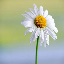

In [31]:
img

In [32]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
# x_train.class_indices
index=['daisy','dandelion','rose','sunflower','tulip']
index[y[0]]

1/1 [==============================] - 0s 170ms/step


'daisy'